In [58]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# Reading and Displaying Audio File

In [66]:
AUDIO_FILE = "AudioFiles/Aryan Speaking.wav"

In [12]:
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

C:\Users\Razer\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


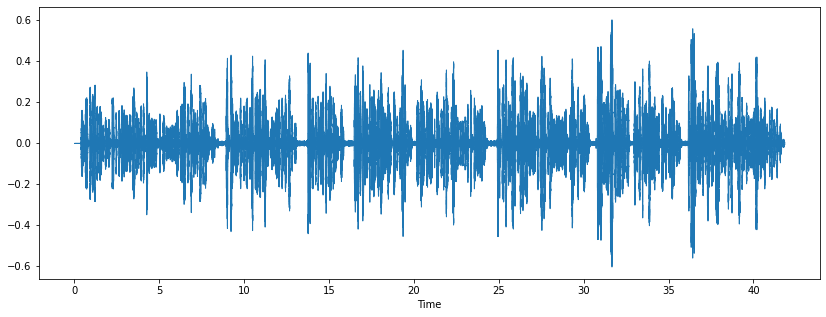

In [13]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(samples, sr=sample_rate)

# Playing Audio File

In [15]:
from IPython.display import Audio
Audio(AUDIO_FILE)

# Spectrograms

C:\Users\Razer\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


Text(0, 0.5, 'Frequency (Hz)')

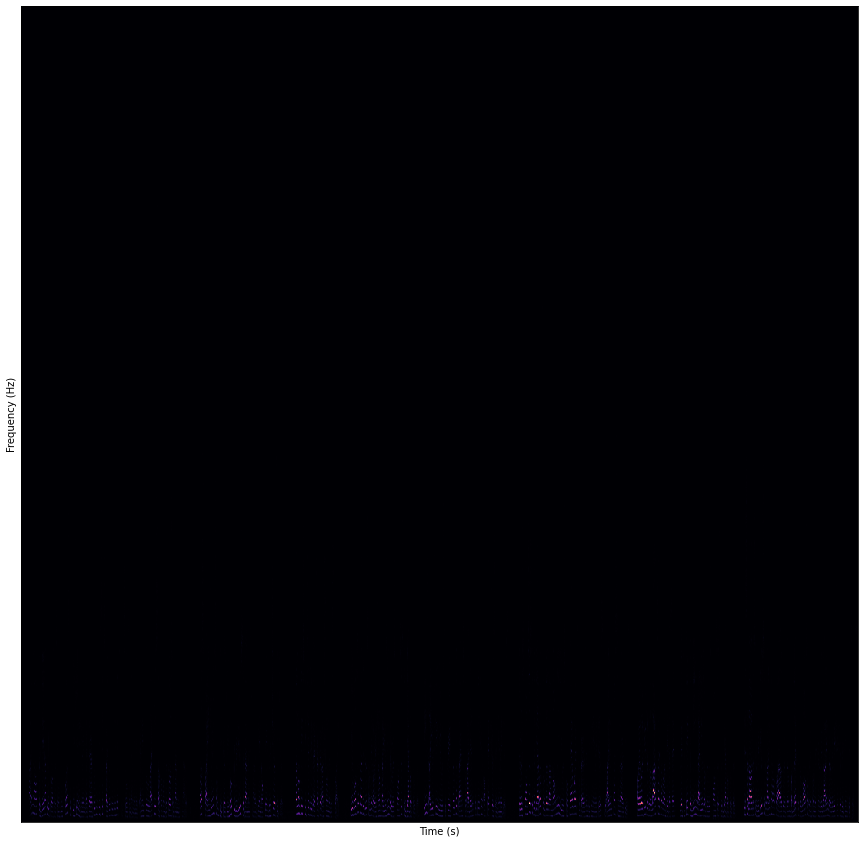

In [39]:
sgram = librosa.stft(samples)

plt.figure(figsize=(15,15))
librosa.display.specshow(sgram)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# Mel Scale

Text(0, 0.5, 'Frequency (Hz)')

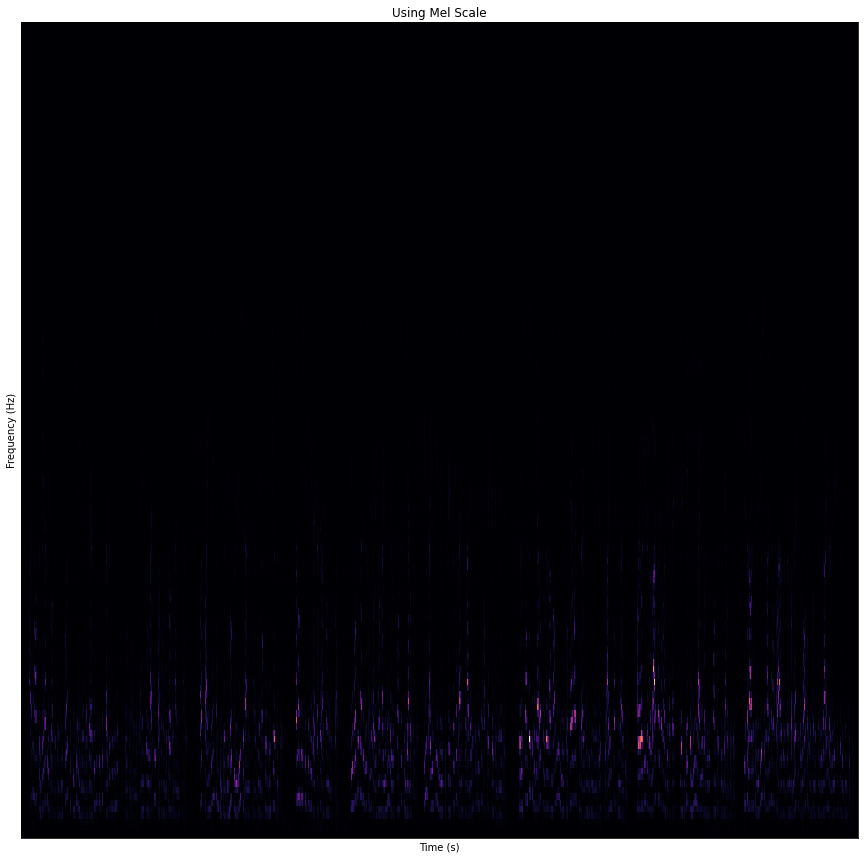

In [40]:
plt.figure(figsize=(15,15))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)
plt.title("Using Mel Scale")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# Using Mel and Decibel Scales

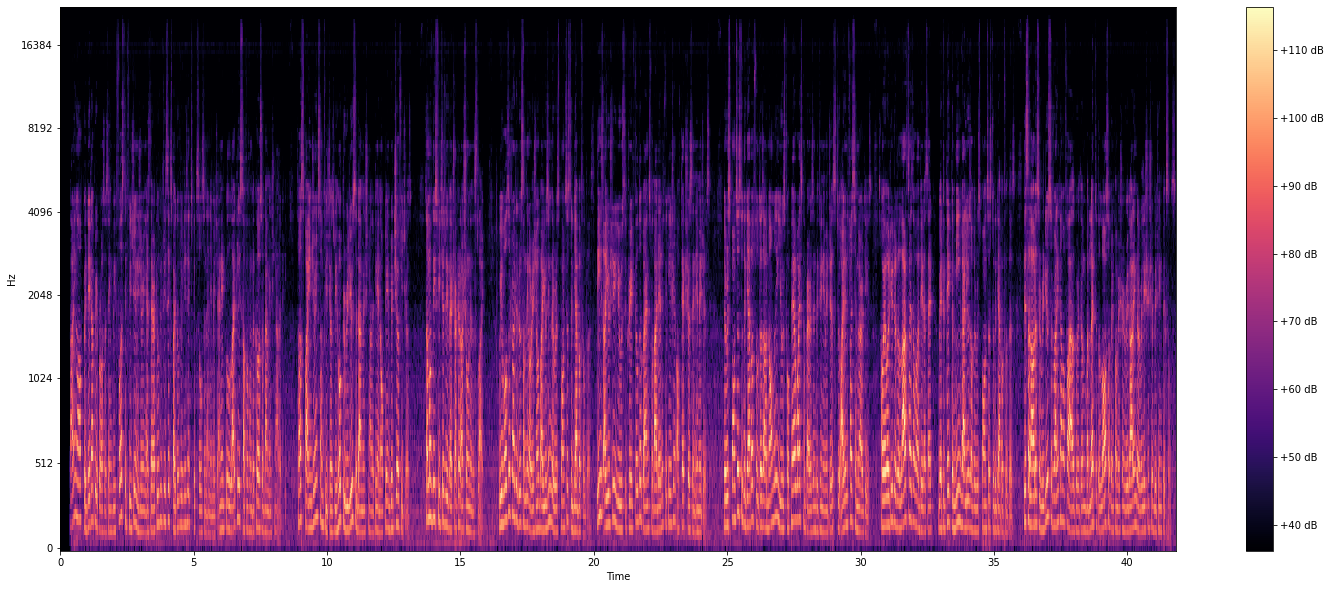

In [50]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
plt.figure(figsize=(25,10))
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# Human Speech Mel Spectrograms

C:\Users\Razer\AppData\Local\Temp\ipykernel_19884\3304167555.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00018311 -0.00045776
 -0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
C:\Users\Razer\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\Razer\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


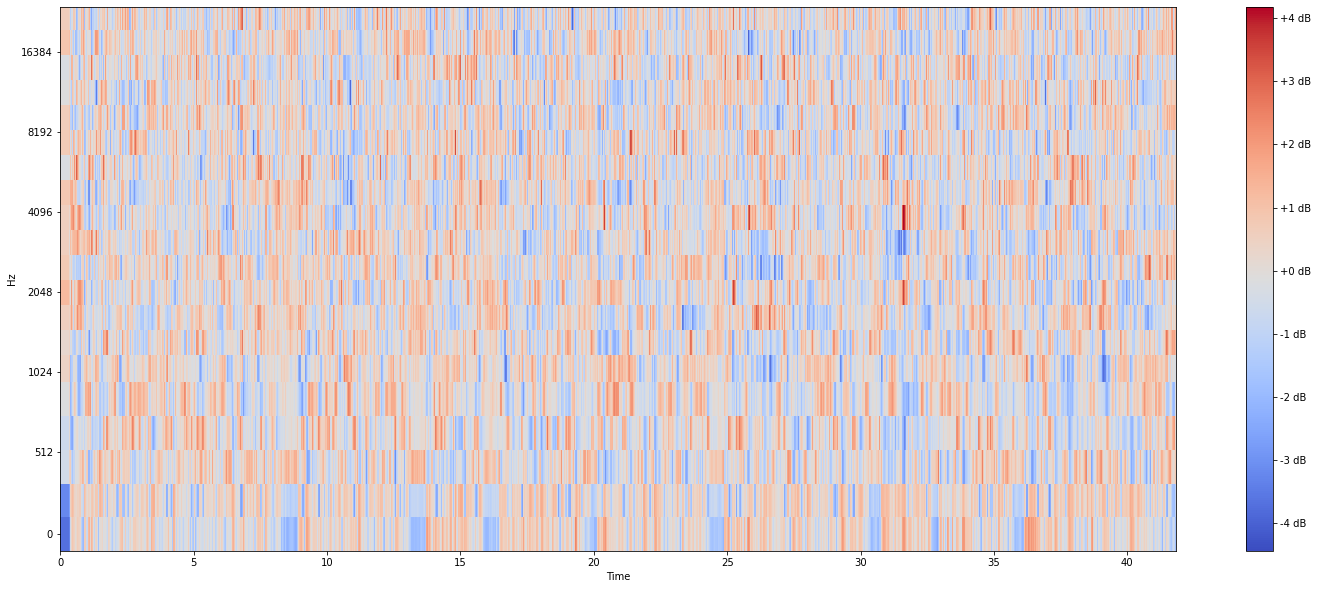

In [56]:
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

plt.figure(figsize=(25,10))

librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time', y_axis="mel")
plt.colorbar(format='%+2.0f dB')

# Using TorchAudio

In [59]:
import torch
import torchaudio
from torchaudio import transforms

In [76]:
class AudioUtil():
    
    @staticmethod
    def load(audio_file):
        sig, sr = torchaudio.load(audio_file)
        return (sig, sr)
    
    @staticmethod
    def rechannel(aud, new_channel):
        sig, sr = aud
        if (sig.shape[0] == new_channel):
            return aud
        
        if (new_channel == 1):
            resig = sig[:1,:]
        else:
            resig= torch.cat([sig, sig])
        
        return ((resig, sr))
    
    @staticmethod
    def resample(aud, newsr):
        sig, sr = aud
        
        if (sr == newsr):
            return aud
        
        num_channels = sig.shape[0]
        # Resample first channel
        resig = transforms.Resample(sr, newsr)(sig[:1, :])
        if (num_channels > 1):
            #Resample 2nd channel
            retwo = transforms.Resample(sr, newsr)(sig[1:,:])
            resig = torch.cat([resig, retwo])
        
        return ((resig, newsr))
    
    @staticmethod
    def pad_trunc(aud, max_ms):
        sig, sr = aud
        
        num_rows, sig_len = sig.shape
        max_len = sr//1000 * max_ms
        
        if (sig_len > max_len):
            sig = sig[:,:max_len]
            
        elif (sig_len < max_len):
            pad_begin_len = np.random.randint(0, max_len - sig_len)
            pad_end_len = max_len - sig_len - pad_begin_len
            
            pad_begin = torch.zeros((num_rows, pad_begin_len))
            pad_end = torch.zeros((num_rows, pad_end_len))
            
            sig = torch.cat((pad_begin, sig, pad_end), 1)
        
        return (sig, ar)
    
    @staticmethod
    def spectrogram(aud, n_mels=64, n_fft=1024, hop_len=None):
        sig, sr = aud
        
        top_db = 80
        
        spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)
        
        spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
        
        return (spec)          

In [77]:
aud = AudioUtil.load(AUDIO_FILE)

Text(0, 0.5, 'Frequency')

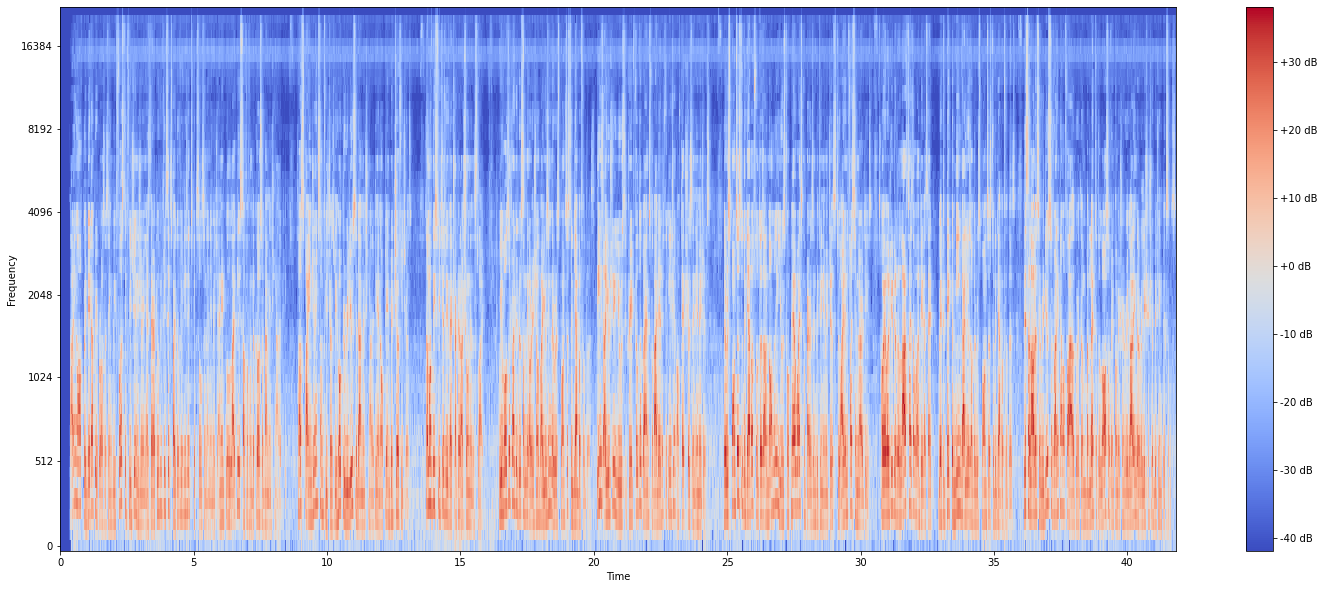

In [103]:
plt.figure(figsize=(25,10))
melspec = AudioUtil.spectrogram(aud)
melspecl_n = melspec.numpy() # (1, #Num of quantised frequencies, #Sample rate)
librosa.display.specshow(melspecl_n[0], y_axis='mel', x_axis='time', sr=aud[1])
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")

In [97]:
melspecl_n.shape

(1, 64, 3603)